University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2022  
Luigi Acerbi  

# Week 6 exercises

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import autograd.numpy as np
import autograd.numpy.random as npr
import autograd.numpy.linalg as npl
import autograd
import pandas as pd
import torch

## 1. Leapfrog integration in HMC (4 points)

In this exercise we will experiment with the leapfrog integrator used in HMC. As a target, we will use the 2D correlated normal 
$$ \pi(\boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\theta} ;\; 0, \boldsymbol{\Sigma}_2), $$
where $ \boldsymbol{\Sigma}_2 = \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix}$ with $\rho = 0.998$.

1. Simulate the system for $L=10$ leapfrog steps starting from the origin $\boldsymbol{\theta}_0 = (0, 0)$ with momentum $r = (1, 1/3)$ with several values of $\epsilon$ and plot the resulting Metropolis-Hastings acceptance probabilities $a$ at the end of the leapfrog trajectory. Considering values of $\epsilon \in [0.001, 0.1]$:
  - What is the smallest $\epsilon$ that will yield acceptance probability below 60%? 
  - What is the largest $\epsilon$ that will yield an acceptance probability above 10%?
  - For this exercise, the required tolerance on the answer is 0.001.
2. Simulate the Hamiltonian system for 500 leapfrog steps with $\epsilon=0.05$ starting from the origin $\boldsymbol{\theta}_0 = (0, 0)$ with momentum $r = (1, 1/3)$. Plot the trajectory and the Euclidean distance from the starting point at each point. 
  - How many leapfrog steps do you need to take until the trajectory reaches the first local maximum distance from the origin?
  - How many leapfrog steps (since the start of the trajectory) will lead you to the first local minimum?

*Note*: This exercise tests only the deterministic leapfrog integration used within the HMC algorithm to produce a single proposal. **This procedure is completely deterministic.** You will not need any random number generators in your solution. In particular, you will not need to run the full HMC algorithm or make any actual accept/reject decisions.

In [2]:
# # Part 1

# L = 10
# theta0 = np.array( [0, 0] )
# r = np.array( [1, 1/3] )
# epsilon = np.arange(0.05, 0.095, 0.001)

# def correlated_normal(x, rho=0.998):
#     """Correlated normal target log pdf."""
#     Sigma = np.array([[1.0, rho],[rho, 1.0]])
#     return -0.5*(x.T @ npl.solve(Sigma, x))

# def hmc(theta0, M, target, epsilon0, L):
#     """Hamiltonian Monte Carlo sampler."""
#     # thetas = np.zeros([M, len(theta0)])
#     gradF = autograd.grad(target)
#     theta = np.copy(theta0)
#     g = gradF(theta)  # set gradient using initial theta
#     logP = target(theta)  # set objective function too
#     accepts = 0
#     for m in range(2*M): # draw M samples after M warm-up iterations
#         p = npr.normal(size=theta.shape)  # initial momentum is Normal(0,1)
#         H = p.T @ p / 2 - logP   # evaluate H(x,p)
#         thetanew = np.copy(theta)
#         gnew = np.copy(g)
#         for l in range(L): # make L 'leapfrog' steps
#             # epsilon = npr.uniform(0.8, 1.2) * epsilon0  # optional: randomise epsilon for improved theoretical convergence properties
#             p = p + epsilon0 * gnew / 2   # make half-step in p
#             thetanew = thetanew + epsilon0 * p    # make step in theta
#             gnew = gradF(thetanew)           # find new gradient
#             p = p + epsilon0 * gnew / 2   # make half-step in p
#         logPnew = target(thetanew)   # find new value of H
#         Hnew = p.T @ p / 2 - logPnew
#         dH = Hnew - H    # Decide whether to accept
#         if np.log(npr.rand()) < -dH:
#             g = gnew
#             theta = thetanew
#             logP = logPnew
#             accepts += 1
#         # if m >= M:
#         #     thetas[m-M,:] = theta
#     # print('Acceptance rate:', accepts/(2*M))
#     acceptance = accepts/(2*M)
#     return acceptance

# acceptances = np.zeros(len(epsilon))

# for i in range(len(epsilon)):
#     acceptances[i] = hmc(theta0, 500, correlated_normal, epsilon[i], L)
# plt.plot(epsilon, acceptances)
# plt.show()

In [3]:
# result = np.where( acceptances < 0.6 )
# print( epsilon[result[0][0]] )

# result = np.where( acceptances > 0.1 )
# print( epsilon[result[0][-1]] )

print('The previous code prints 0.082 for the 0.6 acceptance rate')
print('The previous code prints 0.089 for the 0.1 acceptance rate')

The previous code prints 0.082 for the 0.6 acceptance rate
The previous code prints 0.089 for the 0.1 acceptance rate


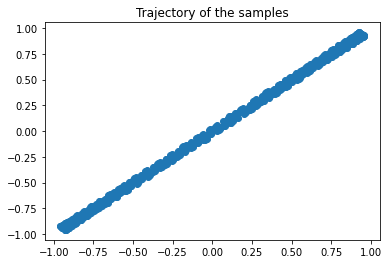

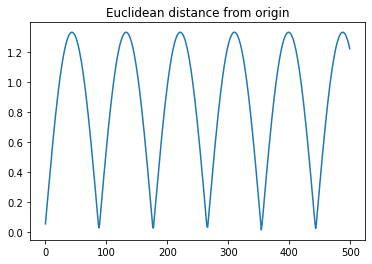

The first local maximum is after 44 steps
The first local minimum is after 89 steps


In [4]:
# Part 2

import scipy.signal as sps

def leapfrog(theta, r, grad, epsilon, f, g):
    # make half step in r
    rprime = r + 0.5 * epsilon * grad
    # make new step in theta
    thetaprime = theta + epsilon * rprime
    #compute new gradient
    gradprime = g(thetaprime)
    # make half step in r again
    rprime = rprime + 0.5 * epsilon * gradprime
    return thetaprime, rprime, gradprime

def correlated_normal(x, rho=0.998):
    """Correlated normal target log pdf."""
    Sigma = np.array([[1.0, rho],[rho, 1.0]])
    return -0.5*(x.T @ npl.solve(Sigma, x))

L = 500
theta0 = np.array( [0, 0] )
r = np.array( [1, 1/3] )
epsilon = 0.05
gradF = autograd.grad(correlated_normal)
theta = np.copy(theta0)
g = gradF(theta)  # set gradient using initial theta
euclid = np.zeros(L)
trajectory = np.zeros( (L, 2) )

for i in range(L):
    theta, r, g= leapfrog(theta, r, g, epsilon, correlated_normal, gradF)
    trajectory[i] = theta
    euclid[i] = npl.norm(theta)

plt.scatter( trajectory[:, 0], trajectory[:, 1] )
plt.title('Trajectory of the samples')
plt.show()

plt.plot( euclid, label='Euclidean distance from origin')
plt.title('Euclidean distance from origin')
plt.show()

print(f'The first local maximum is after {sps.argrelextrema(euclid, np.greater)[0][0] + 1} steps')
print(f'The first local minimum is after {sps.argrelextrema(euclid, np.less)[0][0] + 1} steps')

## 2. Efficiency of "random walk" MCMC and HMC (4 points)

In this exercise we will test the efficiency of Metropolis-Hastings (also known as "random walk" MCMC) and HMC in terms of the distance covered in various situations. 

All the experiments are done using the same correlated normal target as in Exercise 1.
For Metropolis-Hastings MCMC, we will use as proposal $q(\boldsymbol{\theta}'; \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\theta}'; \boldsymbol{\theta}, \sigma^2 \mathbf{I}_2)$ with $\sigma = 0.01$. For HMC, set $\epsilon=0.01$ and $L$ as specified below.

Distance covered here means the distance between the final point and the starting point of the chain, ignoring any intermediate steps.

1. Always starting at $\boldsymbol{\theta}_0 = (0, 0)$, run Metropolis-Hastings MCMC 100 times for 1 step and 100 times for 100 steps. Compute the average Euclidean distance covered from the starting point in each case. Compare the 100 step distance with the theoretical random walk scaling of $\sqrt{n}$ over $n$ steps.
2. Always starting at $\boldsymbol{\theta}_0 = (0, 0)$, run HMC 100 times for 1 step with $L=1$ and 100 times for 1 step with $L=100$. Compute the average Euclidean distance covered from the starting point in each case. Compare the 100 step distance with the theoretical random walk scaling of $\sqrt{n}$ over $n$ steps.
3. Repeat task 1 starting at $\boldsymbol{\theta}_0 = (-2, 2)$.
4. Repeat task 2 starting at $\boldsymbol{\theta}_0 = (-2, 2)$.
5. In each case, report the two average Euclidean distances in Moodle. In which cases do the algorithms move more quickly than would be expected for a random walk?

In [5]:
def correlated_normal(x, rho=0.998):
    """Correlated normal target log pdf."""
    Sigma = np.array([[1.0, rho],[rho, 1.0]])
    return -0.5*(x.T @ npl.solve(Sigma, x))

def d_mhsample(theta0, n, log_target, drawproposal):
    """
    Metropolis-Hastings sampler for n samples from starting point theta0 in arbitrary dimension.
    log_target is the log of the target pdf, and 
    drawproposal samples from the proposal (assumed symmetric).
    """    
    theta = theta0
    d = len(theta0)
    lp = log_target(theta)
    thetas = np.zeros([n, d])
    for i in range(n):
        theta_prop = drawproposal(theta)
        l_prop = log_target(theta_prop)
        if np.log(npr.rand()) < l_prop - lp:
            theta = theta_prop
            lp = l_prop
        thetas[i] = theta
    return thetas

# Part 1.a
euclid = np.zeros(100)

for i in range(100):
    euclid[i] = npl.norm(d_mhsample(np.array([0, 0]), 1, correlated_normal, lambda theta: theta+0.01*npr.normal(size=2)))

print('1.a) Average of MCMC over 100 times 1 step:', euclid.mean())

# Part 1.b
for i in range(100):
    euclid[i] = npl.norm(d_mhsample(np.array([0, 0]), 100, correlated_normal, lambda theta: theta+0.01*npr.normal(size=2))[-1])
    
print('1.b) Average of MCMC over 100 times 100 steps:', euclid.mean())

1.a) Average of MCMC over 100 times 1 step: 0.013550431007545301
1.b) Average of MCMC over 100 times 100 steps: 0.09052676178605829


In [6]:
def hmc(theta0, M, target, epsilon0, L):
    """Hamiltonian Monte Carlo sampler."""
    thetas = np.zeros([M, len(theta0)])
    gradF = autograd.grad(target)
    theta = np.copy(theta0)
    g = gradF(theta)  # set gradient using initial theta
    logP = target(theta)  # set objective function too
    for m in range(M):
        p = npr.normal(size=theta.shape)  # initial momentum is Normal(0,1)
        H = p.T @ p / 2 - logP   # evaluate H(x,p)
        thetanew = np.copy(theta)
        gnew = np.copy(g)
        for l in range(L): # make L 'leapfrog' steps
            epsilon = npr.uniform(0.8, 1.2) * epsilon0  # optional: randomise epsilon for improved theoretical convergence properties
            p = p + epsilon * gnew / 2   # make half-step in p
            thetanew = thetanew + epsilon * p    # make step in theta
            gnew = gradF(thetanew)           # find new gradient
            p = p + epsilon * gnew / 2   # make half-step in p
        logPnew = target(thetanew)   # find new value of H
        Hnew = p.T @ p / 2 - logPnew
        dH = Hnew - H    # Decide whether to accept
        if np.log(npr.rand()) < -dH:
            g = gnew
            theta = thetanew
            logP = logPnew
        thetas[m] = theta
    return thetas

euclid = np.zeros(100)

# Part 2.a

for i in range(100):
    euclid[i] = npl.norm(hmc(np.array([0, 0]), 1, correlated_normal, 0.01, 1))

print('2.a) Average of HMC over 100 times, 1 step, L=1:', euclid.mean())

# Part 2.b

for i in range(100):
    euclid[i] = npl.norm(hmc(np.array([0, 0]), 1, correlated_normal, 0.01, 100))

print('2.b) Average of HMC over 100 times, 1 step, L=100:', euclid.mean())

2.a) Average of HMC over 100 times, 1 step, L=1: 0.011972928952815534
2.b) Average of HMC over 100 times, 1 step, L=100: 0.6730971536560072


In [7]:
# Part 3.a
euclid = np.zeros(100)

for i in range(100):
    euclid[i] = npl.norm(d_mhsample(np.array([-2, 2]), 1, correlated_normal, lambda theta: theta+0.01*npr.normal(size=2)) - np.array([-2, 2]) )

print('3.a) Average of MCMC over 100 times 1 step:', euclid.mean())

# Part 3.b
for i in range(100):
    euclid[i] = npl.norm(d_mhsample(np.array([-2, 2]), 100, correlated_normal, lambda theta: theta+0.01*npr.normal(size=2))[-1] - np.array([-2, 2]) )
    
print('3.b) Average of MCMC over 100 times 100 steps:', euclid.mean())

3.a) Average of MCMC over 100 times 1 step: 0.006998183111659226
3.b) Average of MCMC over 100 times 100 steps: 0.38305018451393363


In [11]:
euclid = np.zeros(100)

# Part 4.a

for i in range(100):
    euclid[i] = npl.norm(hmc(np.array([-2, 2]), 1, correlated_normal, 0.01, 1) - np.array([-2, 2]) )

print('4.a) Average of HMC over 100 times, 1 step, L=1:', euclid.mean())

# Part 4.b

for i in range(100):
    euclid[i] = npl.norm(hmc(np.array([-2, 2]), 1, correlated_normal, 0.01, 100) - np.array([-2, 2]) )

print('4.b) Average of HMC over 100 times, 1 step, L=100:', euclid.mean())

4.a) Average of HMC over 100 times, 1 step, L=1: 0.07399338401720523
4.b) Average of HMC over 100 times, 1 step, L=100: 4.179695566048354


## 3. NUTS simulation (6 points)

In this exercise we will experiment with the build-tree operation of the NUTS algorithm. We will use a simplified version of the algorithm with the following differences from the original:
* We will only extend the path forward instead of choosing the direction randomly.
* We will check for the termination condition only from the entire newly added path segment, not all subpaths as NUTS really would.

Your tasks:
1. Implement a simplified version of NUTS that works as follows:
  - Start at iteration $j = 1$.
  - In each iteration $j$, with $j = 1,2,\ldots$, set $L = 2^{j-1}$ and run $L$ leapfrog steps forward. Deterministically move to the new position (i.e., there is no acceptance check). 
  - At the end of each iteration, a "termination check" is run. The algorithm stops when the first newly simulated position $(\boldsymbol{\theta}^-, \mathbf{r}^-)$ and the last newly simulated position $(\boldsymbol{\theta}^+, \mathbf{r}^+)$ of the trajectory simulated in the current iteration segment satisfy
$$ (\boldsymbol{\theta}^+ - \boldsymbol{\theta}^-) \cdot \mathbf{r}^- < 0 \quad \text{or} \quad (\boldsymbol{\theta}^+ - \boldsymbol{\theta}^-) \cdot \mathbf{r}^+ < 0. $$
2. Run your algorithm on the 2D correlated normal with $\rho = 0.998$, starting from the origin $\boldsymbol{\theta}_0 = (0, 0)$ with momentum $\mathbf{r} = (1, 1/3)$ with $\epsilon=0.05$. At which iteration $j$ of the algorithm will the termination criterion be triggered for the first time? Report the iteration number in Moodle.
3. Compute the distance from the origin of the point at which the termination criterion is triggered, and report it in Moodle.
4. NUTS includes a special condition to simulate $u \sim \mathrm{Uniform}(0, \exp(-H(\boldsymbol{\theta}_0, \mathbf{r}_0))$ and ignoring all points where $u > \exp(-H(\boldsymbol{\theta}, \mathbf{r}))$. Assuming $u = 0.98\exp(-H(\boldsymbol{\theta}_0, \mathbf{r}_0))$ (a pretty extreme value), how many points from the trajectory of $2^j$ points generated during the first $j$ iterations (including the initial state and the one during which the termination condition was triggered first) would be included in the next step of the algorithm when choosing the next point?

## 4. HMC sampling for posterior inference (6 points)

In this task we will apply HMC sampling for posterior inference of a linear regression model.
We will use data from the Framingham Heart Study that studies the association between heart disease and its causes.
A description of the data and its fields can be found at http://www.maths.utas.edu.au/DHStat/Data/Flow.html (see also problem 10.4 in the computer tasks done in class).

We will use a linear regression model
$$ y_i = \mathbf{x}_i \boldsymbol{\beta} + \epsilon_i, $$
where $\mathbf{x}_i$ is a row vector of input variables and $\boldsymbol{\beta}$ is a column vector of regression coefficients, and the noise term $\epsilon_i$ follows the normal $\mathcal{N}(0, \sigma_y^2)$. We will not need a constant intercept term in the model because we will standardise the data.

Assuming the residuals $\epsilon_i, i=1,\dots,n$ are independent, the log-likelihood of the model is
$$ \log p(y | x, \boldsymbol{\beta}, \sigma_y) = \sum_{i=1}^n \log p(y_i | \boldsymbol{\beta}, x_i, \sigma_y) = \sum_{i=1}^n \log \mathcal{N}(y_i; \; \mathbf{x}_i \boldsymbol{\beta}, \sigma_y^2). $$

1. Load the data using the below code. Standardise the data (both $x$ and $y$) by subtracting the mean and dividing each variable by **two** standard deviations (see http://www.stat.columbia.edu/~gelman/research/published/standardizing7.pdf). Fit all the models using the standardised data as this makes sampling a lot easier.
2. Using the above log-likelihood and priors
$$ p(\boldsymbol{\beta}) = \prod_j p(\beta_j) = \prod_j \mathcal{N}(\beta_j;\; 0, 2^2), \\ p(\sigma_y) = \mathrm{Gamma}(\sigma_y;\; k=10, \theta=0.1),$$
use HMC or NUTS to draw samples from the posterior distribution $p(\boldsymbol{\beta}, \sigma_y | x, y)$, when the prediction target variable $y$ is 'SBP' and the input variables $x$ are 'FRW', 'AGE' and 'CHOL'.

To ensure the standard deviation $\sigma_y$ is positive, express it as $\sigma_y = \exp(s_y)$, where $s_y$ is unbounded. Remember to apply the density transformation to transform the prior over $\sigma_y$ to that over $s_y$!

Make sure your sampler is properly tuned so that results will be reliable.

Report your estimates of the posterior means and standard deviations of the coefficient in $\beta$ for 'FRW', and of $s_y$. (*Note*: This should be $s_y$, not $\sigma_y$!)

Implementations of the gamma log-pdf needed for the prior that are compatible with Autograd and PyTorch are provided below for your convenience. (Autograd does not support `scipy.stats.gamma.logpdf` to the level we need. The PyTorch library implementation uses a different parametrisation, so the below implementation is easier for consistency.)

The required tolerance is $\pm 0.01$.

*Note*: The NUTS implementation provided in the course materials sometimes gets stuck and produces a sample with really small variance. If you encounter such behaviour, you should disregard such results.

In [9]:
# For autograd
import pandas as pd
import autograd.numpy as np
import autograd.scipy.special as scs
import autograd

def standardize(x):
    raise(NotImplementedError("Not implemented yet"))

# load the data from CSV file using pandas
fram = pd.read_csv('https://www2.helsinki.fi/sites/default/files/atoms/files/fram.txt', sep='\t')
# convert the variables of interest to numpy arrays for autograd compatibility
# input: Framingham relative weight - the ratio of the subjects weight to the median weight for their sex-height group,
#   age and cholesterole level
x = fram[['FRW', 'AGE', 'CHOL']].values.astype(float)
# target: Systolic blood pressure, examination 1
y = fram['SBP'].values.squeeze().astype(float)

xs = standardize(x)
ys = standardize(y)

def gamma_logpdf(x, k, theta):
    """Gamma distribution log pdf."""
    return -scs.gammaln(k) - k*np.log(theta) + (k-1)*np.log(x) - x / theta

NotImplementedError: Not implemented yet

In [ ]:
# For PyTorch
import pandas as pd
import torch

def standardize(x):
    raise(NotImplementedError("Not implemented yet"))

# load the data from CSV file using pandas
fram = pd.read_csv('https://www2.helsinki.fi/sites/default/files/atoms/files/fram.txt', sep='\t')
# convert the variables of interest to numpy arrays for autograd compatibility
# input: Framingham relative weight - the ratio of the subjects weight to the median weight for their sex-height group,
#   age and cholesterole level
x = fram[['FRW', 'AGE', 'CHOL']].values.astype(float)
# target: Systolic blood pressure, examination 1
y = fram['SBP'].values.squeeze().astype(float)

x = torch.tensor(x, dtype=torch.double)
y = torch.tensor(y, dtype=torch.double)

xs = standardize(x)
ys = standardize(y)

def gamma_logpdf(x, k, theta):
    """Gamma distribution log pdf (PyTorch)."""    
    return -torch.lgamma(k) - k*torch.log(theta) + (k-1)*torch.log(x) - x / theta